hummingage -- a fast and transparent Bayesian Age Depth Model
==================

Age-depth models are used in paleoclimate analyses in the field of reconstructing past climate environments. Vertical sediment profiles (cores) contain information about past environmental conditions at every depth. However, the relation between the depth in a sediment core and the corresponding age of the material is not given at any depth, because of the limited sampling rate (e.g. every 20 cm). To draw age conclusions also from depths inbetween sampling points a way of interpolating the samples is needed, hence the need for age-depth models. Additionally, and similar important (maybe even more) is a good estimation of the errors of the interpolated age-depth relation.

Similar to other methods we apply restrictions to our model, e.g. that age must increase monotonically with depth (e.g. Blaauw and Christen 2005). Further we adopt the idea of an underlying physical accumulation process of the sediment according to a sedimenatation rate (Blaauw and Christen, 2011). The evolution or change of the sedimentation rate over time is responsible for the shape of the age-depth curve.

If there are some good age-depth model on the market, the question arises, why do we need another one. The answer is twofold. (i) our aim is to provide a simple age-depth model, where the user can really get into the source code and adjust it to his/her needs. We don't want a black-box, where the user cannot interact with, unless being a programming and statistics expert. This includes a clear, simple and transparent error estimation, which is crucial. (ii) we apply a new Bayesian step (borrowed from astro-physics), not used yet in this way in age-depth modelling, which finally gives a very attractive answer to the essential question of finding the best fitting curve for the data given the physical basis and restrictions.

Input data
--------------------------------------

As input data for our method we require a strict text format:

"labID","age","error","depth"<br>
1,2.385,1.231,3<br>
2,9.960,1.346,43<br>
3,13.258,1.158,67<br>
4,15.391,1.140,93<br>
5,16.857,1.158,149<br>
6,20.172,1.254,203<br>
7,18.314,1.236,249<br>
8,19.498,1.369,313<br>
9,22.724,1.292,491<br>
10,25.007,1.379,515<br>
11,26.612,1.524,662<br>
12,27.054,2.436,740<br>

The first line must contain the names (exactly as seen in the above example) of the columns, whereas "labID" is simply a running number, "age" is the age of the data (in ka), the "error" is interpreted as a standard deviation and finally we have the depth (in cm). The units must not be ka and cm, however the plots are expecting these units. If you have other units, just change the labels of the plot axes.

The source code of the pure R script and the here shown R code (in Jupyter Notebook) is synchronized. However, the only difference is that we use the script as a function in pure R and as a script here in the Jupyter Notebook. Thus the pure R scripts start like below:

In [101]:
hummingage <- function(path,infile,segments,DiscardOutliers,EstimateNullRate,token,plot_format) {
    ##                                                                                                                                          
    ## usage:                                                                                                                                   
    ## hummingage("/home/user/data/","myfile.csv",c(NaN),TRUE,"estimate","KJmpmGgQ","png,pdf")                                                  
    ## hummingage("/home/user/data/","myfile.csv",c(124),FALSE,"estimate","KJmpmGgQ","png")                                                     
    ## hummingage("/home/user/data/","myfile.csv",c(334,856,1223),TRUE,"estimate","KJmpmGgQ","pdf")                                             
    ## segments in cm                                                                                                                           

    ## path: (string): is the path to the infile                                                                                                
    ## infile: (string): is the data file according to a certain format                                                                         
    ## segments: (integer array): is an array indicating roughly the positions of the segments, use c(NaN) for no segments                      
    ## DiscardOutliers: (boolean): can be TRUE or FALSE. If true, a simple algorithm is applied to identify outliers                            
    ## EstimateNullRate: (string or integer): possible values are                                                                               
    ##                   "estimate": the x-axis offset is estimated from the data                                                               
    ##                   "null": the x-axis offset is set to 0                                                                                  
    ##                   negative or positive integer: x-axis offset is set to the inserted value, e.g. -42, 14, ... (in cm)                    
    ## token: (string): this is a random string, which can be choosen arbitrarily                                                               
    ## plot_format (string): this can be "png,pdf", "png" or "pdf" and defines what kinds of images are written to disk                         
    ##                       both, png and pdf or only png or pdf                                                                               
    ##  
    ...
    }

whereas here in the Notebook we start with the code below. The "path" is simply the path to our data and "infile" holds the name of our data file. "segments" is crucial, while it defines in how many segments we split our data. More details are given later, here we just need to know that segments is an array. We use "c(NaN)" if do not want to split the data. We use "c(103)" if we want to split the data between the sample point before depth=103 cm and after depth=103 cm. The same would be accomplished by "c(105)", so segments do not need to be exact. If we would have used "c(103,345,564)" we would have split the data into four segments, i.e. cutting three times. As said above, we restrict the age data to increase monotonically with depth, thus negative accumulation rates are not allowed. A simple algorithm can be used to remove negative rates, i.e. outliers from the data by setting "DiscardOutliers=TRUE". It is important to note that it is recommended to quality control the data before to remove data by expert knowledge. In order to calculate back from the rates to the ages we need to estimate the rate at depth $0$. Set "EstimateNullRate" to "estimate" to let the algorithm estimate the nullrate or use "null" to set it to $0$ or set it to an integer defining the depth-axis crossing. We use a "token" value as a prefix for the output data. For instance the png figure for the rates is named "KHzvfrTgfX_rates.png" etc. The parameter "plot_format" is used to define the output format of the plots, whereas plot_format="png,pdf" yields both png and pdf, other possibilities are plot_format="png", plot_format="pdf" and plot_format="jupyter", which enables the plotting on the default device, e.g. here in the Jupyter Notebook or X11 on a Linux system.

In [102]:
path <- "/home/jovyan/work/hummingage/"
infile <- "my_test_data_1.csv"
segments <- c(420)
DiscardOutliers <- TRUE
EstimateNullRate <- "estimate"
token <- "KHzvfrTgfX"
#plot_format <- "png,pdf"
plot_format <- "jupyter"                                                                                                                   
#plot_format <- ""

    ## path: (string): is the path to the infile                                                                                                
    ## infile: (string): is the data file according to a certain format                                                                         
    ## segments: (integer array): is an array indicating roughly the positions of the segments, use c(NaN) for no segments                      
    ## DiscardOutliers: (boolean): can be TRUE or FALSE. If true, a simple algorithm is applied to identify outliers                            
    ## EstimateNullRate: (string or integer): possible values are                                                                               
    ##                   "estimate": the x-axis offset is estimated from the data                                                               
    ##                   "null": the x-axis offset is set to 0                                                                                  
    ##                   negative or positive integer: x-axis offset is set to the inserted value, e.g. -42, 14, ... (in cm)                    
    ## token: (string): this is a random string, which can be choosen arbitrarily                                                               
    ## plot_format (string): this can be "png,pdf", "png" or "pdf" and defines what kinds of images are written to disk                         
    ##                       both, png and pdf or only png or pdf                                                                               
    ##  

Next, we load the data and define some setting. Additionally we calculate the sedimentation rates $accRatesOrig$. Token is {{token}}

In [103]:
## full file-path                                                                                                                                                                        
    xfile <- paste(path,infile,sep="");

    ## transform plot_format to array                                                                                                                                                        
    plot_format_tmp <- strsplit(plot_format,",")
    plot_format <- plot_format_tmp[[1]]


    ## load the infile and save as ageDataOrig                                                                                                                                               
    ageDataOrig <- read.table(xfile, header = TRUE,sep=",")

    ## if no segment will be used set it to empty                                                                                                                                            
    if (is.nan(segments)){
        segments = c()
    }

    ## calculate length and estimate rates                                                                                                                                                   
    lengthData <- length(ageDataOrig$depth)
    diffDepths <- diff(ageDataOrig$depth)
    accRatesOrig <- diff(ageDataOrig$age)/diffDepths


We implemented a simple method to exclude negative rates from the analysis, which is executed if $DiscardOuliers \; \mbox{<-} \; true$. The method simply searches for negative rates. If a negative rate has been found the method must decide, which age value is the outlier, the value at depth $i$ or $i+1$. Therefore we calculate the mean of the age values at $i-1$ and $i+2$. Then we evaluate which of the values at $i$ and $i+1$ is farther away from the mean, which means that this value is the outlier. If the age value at $i$ is the outlier, it's fine. If it is $i+1$ we we set $negRatesIndex[m] \; \mbox{<-} \; negRatesIndex[m]+1$, because we want to remove the age data at $i+1$.
It is important to note that this is a very simple approach and that it must used with caution. For instance removing age points can yield to the introduction of new negative rates. An improvement would be to extend the method to check the data recursively until no negative rate is left. Therefore we recomment to quality control your data before.

In [104]:
##--------------------------------------------------------------------------------------------##                                                                                         
    ## this block is only executed if DiscardOutliers == TRUE                                                                                                                                
    ## identify negative rates, i.e. outliers                                                                                                                                                
    ## the difficulty is to identify the outlier                                                                                                                                             
    ## i.e. which age is the outlier, because the rate is calculated from two ages                                                                                                           
    ## thus we take the ages left and right to the two ages which make the negative rate                                                                                                     
    ## and then we calculate which age is further away from the mean of the two left                                                                                                         
    ## and rights                                                                                                                                                                            
    if (DiscardOutliers==TRUE){
        ## find negative rates                                                                                                                                                               
        negRatesIndex <- which(accRatesOrig < 0)
    } else {
        ## set this to empty                                                                                                                                                                 
        negRatesIndex <- integer(0)
    }
    ## make a copy of the indices of the negative rates                                                                                                                                      
    negRatesIndexCopy <- negRatesIndex

    ## go through the negative rates and decide which age is the outlier, left or right                                                                                                      
    m <- 1
    for (i in negRatesIndexCopy) {
        ## skip the first                                                                                                                                                                    
        if (i==1){
            next
        }
        ## calculate the mean between the left and right age next to the two                                                                                                                 
        ## ages, which where used to calculate the rate                                                                                                                                      
        TheMean <- (ageDataOrig$age[(i-1)]+ageDataOrig$age[(i+2)])/2
        ## distance of the left age to the mean                                                                                                                                              
        dist1 <- abs(ageDataOrig$age[(i)]-TheMean)
        ## distance of the right age to the mean                                                                                                                                             
        dist2 <- abs(ageDataOrig$age[(i+1)]-TheMean)
        ## if the right is further away then this is the outlier                                                                                                                             
        ## so increment the index                                                                                                                                                            
        ## otherwise it's the left and leave the index                                                                                                                                       
        if (dist2>dist1){
            negRatesIndex[m] <- negRatesIndex[m]+1
        }
        m <- m+1
    }
    ##--------------------------------------------------------------------------------------------##  

In the next step we remove the outliers from the age data. Accordingly we again calculate the sedimentation rates $accRates$ and the corresponding standard deviations, where we use the Gaussian error propagation for the standard deviation of a difference. For simplicity we assume independence of the age data.

In [105]:
## remove extreme rates and exclude the first                                                                                                                                            
    ## because the first must be estimated later below                                                                                                                                       
    ## remove outliers from original data                                                                                                                                                    
    ## or copy data as they are, if there are no outliers                                                                                                                                    
    LnegRatesIndex <- length(negRatesIndex)
    if (LnegRatesIndex>0){
        ## remove data                                                                                                                                                                       
        ageData <- ageDataOrig[-negRatesIndex,]
    } else {
        ## leave data as they are                                                                                                                                                            
        ageData <- ageDataOrig
    }

    ## now, outliers have been removed calculate again length, rates etc.                                                                                                                    
    lengthData <- length(ageData$depth)
    diffDepths <- diff(ageData$depth)
    accRates <- diff(ageData$age)/diffDepths
    sigmaRates <- sqrt((ageData$error[2:lengthData]^2+ageData$error[1:(lengthData-1)]^2))/diffDepths


Now we have to find the position of the above defined segments. Since we have defined the positions of the segments in cm, we have to find now the corresponding indices in the $depth$ vector. Finally we add $0$ and $lengthData$ to the $segPos$.

In [106]:
 ## convert segments from depth to point number                                                                                                                                           
    ## find the position, i.e. between the two closest points                                                                                                                                
    Lsegments <- length(segments)
    if (Lsegments == 0) {
        segPos = c()
    } else {
        segPos <- rep(0,Lsegments)
        for (i in seq(1,Lsegments)){
            ## difference between depth variable and a sequence position (in cm)                                                                                                             
            Xdiff <- ageData$depth-segments[i]
            ## find the indices smaller than the segment position                                                                                                                            
            a <- which(Xdiff<0)
            ## set the position at the last negative                                                                                                                                         
            segPos[i] <- max(a)
        }
    }

    ## copy of segPos                                                                                                                                                                        
    segPosPlot <- segPos
    ## add left and right boundaries to segPos                                                                                                                                               
    segPos <- c(0,segPos,lengthData)
    segPosLength <- length(segPos)


A crucial point in using the segmentation rates as basis for the regression of the original age data is that the  we have $N-1$ data points for the rates (if we had $N$ data points for the ages), simply because of the differential quotient used to estimate the rates. Thus we need to estimate the "null" rate at depth $0$, i.e. the depth-axis crossing. This is needed to convert back later from the rates to the ages to calculate the first age value. If "EstimateNullRate" is set to "estimate" we apply a linear regression to the first three age values to find the depth-axis crossing. If it is set to "null" we choose $0$ as depth-crossing or if the user gives an integer value, this is used as the depth-crossing value. Finally we calculate the $NullRate$ and $NullError$.

In [107]:
##--------------------------------------------------------------------------------------------##                                                                                         
    ##  estimate the x-axis crossing to estimate the first rate                                                                                                                              
    ##  if we would take the origin 0,0 than the first rate will be wrong                                                                                                                    
    ##  because there is an offset                                                                                                                                                           
    ##                                                                                                                                                                                       
    ##  so, we fit the first segment and estimate the x-crossing                                                                                                                             
    ##  cut out first segment                                                                                                                                                                
    xcrossing <- 0
    if (EstimateNullRate == "estimate"){
        N <- 3
        Lu <- length(1:N)
        u <- ageData$age[1:N]
        X <- replicate(2,rep(1,Lu))
        X[,2] <- ageData$depth[1:N]
        ##  print(X)                                                                                                                                                                         
        beta <- solve(t(X) %*% X) %*% t(X) %*% u
        ##  print(beta)                                                                                                                                                                      
        ##  only if slope is positive                                                                                                                                                        
        if (beta[2]>0){
            xcrossing <- beta[1]/beta[2]*(-1)
            ##  print(xcrossing)                                                                                                                                                             
        } else {
            xcrossing <- 0
        }
    }
    if (EstimateNullRate == "null"){
        xcrossing <- 0
    }
    if (is.numeric(EstimateNullRate) == TRUE){
        ##  then this is xcrossing                                                                                                                                                           
        xcrossing <- EstimateNullRate
    }
    NullDiff <- ageData$depth[1]-xcrossing
    NullRate <- ageData$age[1]/NullDiff
    NullError <- ageData$error[1]/NullDiff
    ##--------------------------------------------------------------------------------------------##    

Now we can add the $NullRate$ and the $NullError$ to the rates and errors, respectively. Additionally 
we initialise arrays for the folling fit. 

In [108]:
## now we have the first rate and add it to the rates                                                                                                                                    
    accRates <- c(NullRate,accRates)
    ## print(accRates)                                                                                                                                                                       
    ## add also a std for the first                                                                                                                                                          
    sigmaRates <- c(NullError,sigmaRates)

    ## initialise arrays for the fits                                                                                                                                                        
    fittedRates <- rep(0,lengthData)
    fittedError <- rep(0,lengthData)


The next step is to apply linear regressions to the segments. The $fittedError$ is the Root Mean Square Error (RMSE) of the rates and the regression.

In [109]:
##--------------------------------------------------------------------------------------------##                                                                                         
    ## fitting the segments                                                                                                                                                                  
    for (i in seq(2,segPosLength)) {
        ##  least square                                                                                                                                                                     
        Xsegment <- (segPos[i-1]+1):segPos[i]
        Lsegment <- length(Xsegment)
        ##  create X matrix                                                                                                                                                                  
        X <- replicate(2,rep(1,Lsegment))
        X[,2] <- ageData$depth[Xsegment]
        ##  create error matrix                                                                                                                                                              
        g <- solve(t(X) %*% X)
        ##  print(g)                                                                                                                                                                         
        beta <- g %*% t(X) %*% accRates[Xsegment]
        ##  print(beta)                                                                                                                                                                      
        fittedRates[Xsegment] <- X %*% beta
        ##  res                                                                                                                                                                              
        fittedError[Xsegment] <- sqrt(1/(Lsegment-1) * sum((fittedRates[Xsegment]-accRates[Xsegment])^2))
        ##  print(fittedError[Xsegment])                                                                                                                                                     
    }
    ##--------------------------------------------------------------------------------------------##        

After fitting the rates we calculate the Bayesian Information Criterion (BIC) and write the result into a file. The BIC helps us to find the optimal number of segments. It prevents for overfitting by judging the goodness of the fit by the Mean Square Error (MSE) and using the number of segments as a penalty parameter. Thus, the smallest (which is the optimal) BIC is observed by achieving the smallest MSE while simultaneously using as few as possible segments.

In [110]:
##--------------------------------------------------------------------------------------------##                                                                                         
    ##  BIC                                                                                                                                                                                  
    ##  BIC for Gaussian approx. is BIC=N*ln(epsilon^2)+k*ln(N)                                                                                                                              
    ##  for fitting a linear regression one need k=q+2 parameters to be estimated                                                                                                            
    ##  one for the intercept, q for the slopes and one for the rmse                                                                                                                         
    ##  thus in the case of fitting the mean I need k=2 (intercept, rmse)                                                                                                                    
    ##  BIC[segments] <- N * log(rmse^2) + 2*segments * log(N)                                                                                                                               
    mse <- 1/lengthData * sum((fittedRates-accRates)^2)
    BIC <- lengthData * log(mse) + (2*(segPosLength-1)+1) * log(lengthData)
    ## (segPosLength-1) because above I have added 0,segPos,N to segPos                                                                                                                      
    ## thus (segPosLength-1) is exactly the number of segments                                                                                                                               
    ## write out the BIC                                                                                                                                                                     
    write(BIC,file=paste(path,token,"_BIC.txt",sep=""),ncolumns=1)
    ##--------------------------------------------------------------------------------------------##     

The last step before plotting the results is to tune the regressions with a Bayesian approach and finally convert the regressions of the rates back to ages. The Bayesian tuning is inspired by Bailer-Jones, 2012 (https://doi.org/10.1051/0004-6361/201220109). The idea is to use all available information for the final conlcusions. Normally we would stop here and use the fitted rates as our result. However, the linear regressions are clearly somehow artificially and we would not say that these are the truth. The original data are also not the truth, because they are prone to error. That means, the truth lies somewhere inbetween the original data and the fitted values. Using the Bayesian approach and approximating all ingredients by Gaussians we find a very simple and intuitive solution to this problem. It turns out, that the best fit is the weighted avarage of the original rate and the fitted rate at every depth. A non-Gaussian approach would require a much more complicated estimation, however it is thinkable as an extension to implement also a non-Gaussian methodology. For now we stick to the Gaussian approximation. As said above the best estimate of the rates seems to be inbetween the original "measured" rates and the fit.

This can be formulated using probability theory and Bayes theorem. Bayes theorem is given by

$\mbox{prob}(Y|X)=\frac{\mbox{prob}(X|Y) \, \times \mbox{prob}(Y)}{\mbox{prob}(X)}$

The left part is called posterior probability, the first term on the right side is the likelihood, the right term the prior probability, whereas the term in the denominator is mostly named evidence.

For a better understanding, the terms can also be interpreted as:

$\mbox{prob}(hypothesis|data) \propto \mbox{prob}(data|hypothesis) \times \mbox{prob}(hypothesis)$

We have omitted the denominator, which represents essentially a normalisation factor and thus replaced the $=$ by a $\propto$. In the case of normalised likelihood and prior the $=$ can be used because the evidence would be unity.

In words this means that we want to estimate the probability of a hypothesis given specific data. This can be indeed calculated if we know the probability of the data given the hypothesis and the probability of the hypothesis itself.

Regarding our age data we can now ask what is the probabilty of observing a best estimate of the true rates given our observation:

$\mbox{prob}(fittedRates|accRates) \propto \mbox{prob}(accRates|fittedRates) \, \times \mbox{prob}(fittedRates)$

A crucial point is now to follow a Gaussian approach, which allows us to solve the above equation analytical. In the case of a non-gaussian approach the solution can most probably only be found numerically, e.g. using a Markov Chain Monte Carlo (MCMC) algorithm.

Before identifying the exact Gaussians we can simplify the equation above. The likelihood, i.e. the probability of the rates given the fit reduces to $\mbox{prob}(accRates) = \mbox{prob}(accRates|fittedRates)$, thus:

$\mbox{prob}(fittedRates|accRates) \propto \mbox{prob}(accRates) \, \times \mbox{prob}(fittedRates)$

To every point of the estimated rates and the fit we can associate a Gaussian distribution. The probability of the estimated rates can be defined as $\mbox{prob}(accRates) = N(\mu=accRates,\sigma=sigmaRates)$. The probability of the fitted rates can be defined as $\mbox{prob}(fittedRates) = N(\mu=fittedRates,\sigma=fittedError)$.
Since we are dealing with Gaussian normal distributions, which are normalised per definition and fully described by the mean and standard deviation we can replace the $\propto$ by a $=$. 

Thus we have to calculate:

$\mbox{prob}(fittedRates|accRates) = N(\mu=accRates,\sigma=sigmaRates) \times N(\mu=fittedRates,\sigma=fittedError)$

We see that we can find a solution by multiplying two Gaussian distributions. The multiplication of two Gaussians $f$ and $g$ with means $\mu_f$ and $\mu_g$ and variances $V_f$ and $V_g$ is given by the following formulas:

mean $=\frac{\mu_f V_g + \mu_g V_f}{V_f+V_g}$

variance = $\frac{V_f \times V_g}{V_f+V_g}$

which yield the mean and variance. However, it has to be noted that the product of two Gaussians is.

Interestigly it turns out that the new estimate of the fitted rates is exactly the weighted mean of the observations and the fitted rates, whereas the errors represent the weights. This result is due to fact that we used a Gaussian assumption. Further it can be seen that this approach is a so called objective Bayesian analysis, because it involves no subjective prior information, again due to the Gaussian approach.

Applying these formulas to our data, we get a new estimate for the fitted accumulation rates:

In [111]:
##-------------------------------------------------------------------------------------------##                                                                                         
    ## apply the Bayesian approach, i.e. for the Gaussian assumption the weighted mean                                                                                                       
    BayesFittedRates <- (fittedRates * sigmaRates^2 + accRates * fittedError^2)/(fittedError^2 + sigmaRates^2)
    ## disable Bayes                                                                                                                                                                         
    ##BayesFittedRates <- fittedRates                                                                                                                                                        

    ## and the weighted std                                                                                                                                                                  
    BayesSigmaRates <- sqrt((fittedError^2 * sigmaRates^2)/(fittedError^2 + sigmaRates^2))
    ## disable Bayes                                                                                                                                                                         
    ##BayesSigmaRates <- fittedError                                                                                                                                                         


    ## calculate the ages from the rates                                                                                                                                                     
    ageFit <- cumsum(BayesFittedRates * c(NullDiff,diffDepths))
    ##  print("sum1")                                                                                                                                                                        
    ##  print(sum((ageFit-ageData$age)^2))                                                                                                                                                   

    ##  and the errors                                                                                                                                                                       
    ageFitError <- rep(0,lengthData)
    ageFitError[1] <- BayesSigmaRates[1]*NullDiff
    for (i in seq(1,(lengthData-1))) {
        ageFitError[i+1] <- sqrt(ageFitError[i]^2+(BayesSigmaRates[i+1]*diffDepths[i])^2)
    }
    ##--------------------------------------------------------------------------------------------##     

As can be seen from above, we calculate the regression for the age data by simply inverting the rate estimation, i.e. we calculate the cumulative sum of the rate regression to get the age regression.
Similarly the errors are estimated. An interesting effect is observed here, i.e. the errors are monotonically increasing with depth, because the error at one depth is fully propagated to the next depth, because of the cumulative summation. This makes a lot of sense, because deeper measurements should be more uncertain.

The last part of the method is the visualization of the results. First we plot the fitted rates without the Bayesian approach.

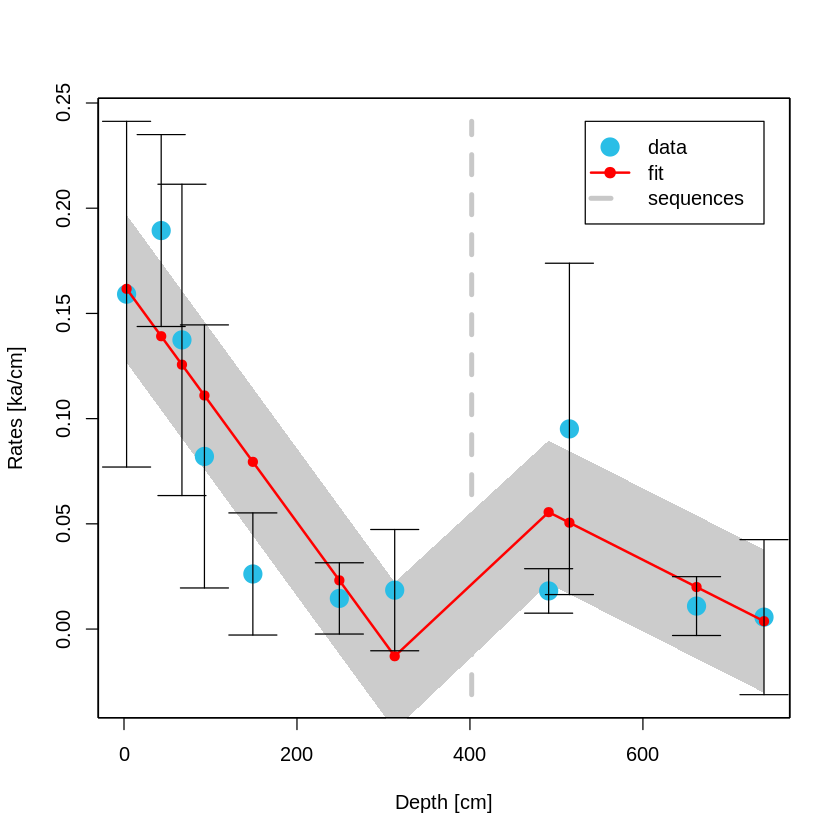

In [112]:
## plotting the intermediate result of fitted segments                                                                                                                                   
    for (k in plot_format){    
        if (k == "jupyter"){
            Ascale <- 1 #4
            Bscale <- 1 #6
            Cscale <- 2 #8
            Dscale <- 4 #12    
        } else {
            Ascale <- 4
            Bscale <- 6
            Cscale <- 8
            Dscale <- 12    

            par(mar=c(14,14,4,2),mgp=c(10,4,0),bg=rgb(248/255,250/255,252/255))    
            if (k == "png"){
                png(filename=paste(path,token,"_intermediate.png",sep=""),width=2000,height=1400,pointsize=10)#,width=11,height=8)                                                               
            }
            if (k == "pdf"){
                pdf(file=paste(path,token,"_intermediate.pdf",sep=""),width=40,height=28)#,width=11,height=8)                                                                                    
            }
        }
        

        


        ymin <- min(c(accRates-sigmaRates),na.rm=TRUE)
        ymax <- max(c(accRates+sigmaRates),na.rm=TRUE)
        xmin <- 0 ##min(ageDataOrig$depth)                                                                                                                                                   
        xmax <- max(ageDataOrig$depth)
        plot(ageData$depth,accRates,ylim=c(ymin,ymax),xlim=c(xmin,xmax),xlab="Depth [cm]",ylab="Rates [ka/cm]",cex.lab=Ascale,cex.axis=Ascale)
        if (Lsegments > 0) {
            for (i in seq(1,length(segPosPlot))) {
                par(new=TRUE)
                segPosDepth <- (ageData$depth[segPosPlot[i]]+ageData$depth[segPosPlot[i]+1])/2
                plot(c(segPosDepth,segPosDepth),c(ymin,ymax),ylim=c(ymin,ymax),xlim=c(xmin,xmax),col=rgb(200/255,200/255,200/255),type="l",lwd=Dscale,lty=2,xlab="",ylab="",xaxt="n",yaxt="n",cex=Cscale)
            }
        }
        par(new=TRUE)
        polygon(c(ageData$depth, rev(ageData$depth)), c(fittedRates-fittedError,
                                                        rev(fittedRates+fittedError)), col=rgb(0.8,0.8,0.8),border=NA)
        par(new=TRUE)
        plot(ageData$depth,accRates,ylim=c(ymin,ymax),xlim=c(xmin,xmax),col=rgb(42/255,190/255,230/255),pch=19,xlab="",ylab="",xaxt="n",yaxt="n",cex=Cscale)
        par(new=TRUE)
        plot(ageData$depth,fittedRates,ylim=c(ymin,ymax),xlim=c(xmin,xmax),xlab="",pch=19,ylab="",xaxt="n",yaxt="n",col="red",cex=Ascale)
        par(new=TRUE)
        plot(ageData$depth,fittedRates,ylim=c(ymin,ymax),xlim=c(xmin,xmax),lwd=Cscale,xlab="",ylab="",xaxt="n",yaxt="n",type="l",col="red",cex=Cscale)

        arrows(ageData$depth, accRates-sigmaRates, ageData$depth,
               accRates+sigmaRates, length=0.2, angle=90, code=3,col="black",lwd=Bscale,cex=Cscale)

        legend(xmax, ymax, xjust=1,legend=c("data","fit","sequences"),
               col=c(rgb(42/255,190/255,230/255),"red",rgb(200/255,200/255,200/255)), lwd=c(NaN,Cscale,Dscale), lty=c(1,1,2), pch=c(19,19,NaN), cex=c(Bscale), pt.cex=c(Cscale,Ascale,Cscale))
        if (k != "jupyter"){
            dev.off()
        }
    }
    ##--------------------------------------------------------------------------------------------## 

Now we plot the rates including the Bayesian approach.

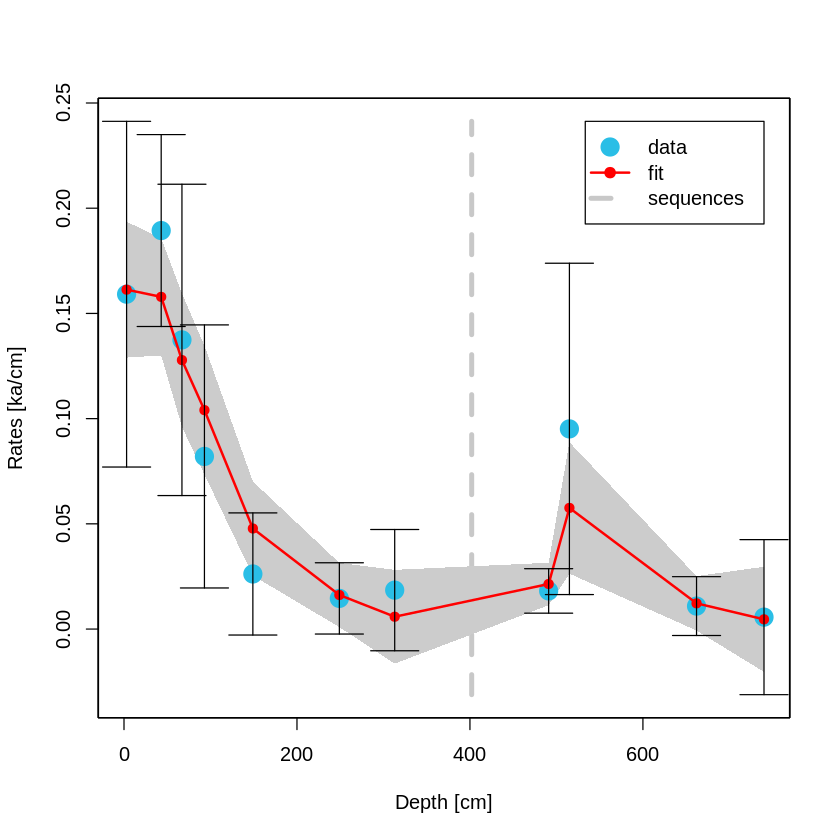

In [113]:
## plotting rates                                                                                                                                                                        
    for (k in plot_format){
        if (k == "jupyter"){
            Ascale <- 1 #4                                                                                                                                                                   
            Bscale <- 1 #6                                                                                                                                                                   
            Cscale <- 2 #8                                                                                                                                                                   
            Dscale <- 4 #12                                                                                                                                                                  
        } else {
            Ascale <- 4
            Bscale <- 6
            Cscale <- 8
            Dscale <- 12

            par(mar=c(14,14,4,2),mgp=c(10,4,0),bg=rgb(248/255,250/255,252/255))
            if (k == "png"){
                png(filename=paste(path,token,"_rates.png",sep=""),width=2000,height=1400,pointsize=10)#,width=11,height=8)                                                                  
            }
            if (k == "pdf"){
                pdf(file=paste(path,token,"_rates.pdf",sep=""),width=40,height=28)#,width=11,height=8)                                                                                       
            }
        }

        ymin <- min(c(accRates-sigmaRates),na.rm=TRUE)
        ymax <- max(c(accRates+sigmaRates),na.rm=TRUE)

        xmin <- 0 ##min(ageDataOrig$depth)                                                                                                                                                   
        xmax <- max(ageDataOrig$depth)
        plot(ageData$depth,accRates,ylim=c(ymin,ymax),xlim=c(xmin,xmax),xlab="Depth [cm]",ylab="Rates [ka/cm]",cex.lab=Ascale,cex.axis=Ascale)
        if (Lsegments > 0) {
            for (i in seq(1,length(segPosPlot))) {
                par(new=TRUE)
                segPosDepth <- (ageData$depth[segPosPlot[i]]+ageData$depth[segPosPlot[i]+1])/2
                plot(c(segPosDepth,segPosDepth),c(ymin,ymax),ylim=c(ymin,ymax),xlim=c(xmin,xmax),col=rgb(200/255,200/255,200/255),type="l",lwd=Dscale,lty=2,xlab="",ylab="",xaxt="n",yaxt="n",cex=Cscale)
            }
        }
        par(new=TRUE)
        polygon(c(ageData$depth, rev(ageData$depth)), c(BayesFittedRates-BayesSigmaRates,
                                                        rev(BayesFittedRates+BayesSigmaRates)), col=rgb(0.8,0.8,0.8),border=NA)
        par(new=TRUE)
        plot(ageData$depth,accRates,ylim=c(ymin,ymax),xlim=c(xmin,xmax),col=rgb(42/255,190/255,230/255),pch=19,xlab="",ylab="",xaxt="n",yaxt="n",cex=Cscale)
        par(new=TRUE)
        plot(ageData$depth,BayesFittedRates,ylim=c(ymin,ymax),xlim=c(xmin,xmax),xlab="",pch=19,ylab="",xaxt="n",yaxt="n",col="red",cex=Ascale)
        par(new=TRUE)
        plot(ageData$depth,BayesFittedRates,ylim=c(ymin,ymax),xlim=c(xmin,xmax),lwd=Cscale,xlab="",ylab="",xaxt="n",yaxt="n",type="l",col="red",cex=Cscale)
        arrows(ageData$depth, accRates-sigmaRates, ageData$depth,
               accRates+sigmaRates, length=0.2, angle=90, code=3,col="black",lwd=Bscale,cex=Cscale)

        legend(xmax, ymax, xjust=1,legend=c("data","fit","sequences"),
               col=c(rgb(42/255,190/255,230/255),"red",rgb(200/255,200/255,200/255)), lwd=c(NaN,Cscale,Dscale), lty=c(1,1,2), pch=c(19,19,NaN), cex=c(Bscale), pt.cex=c(Cscale,Ascale,Cscale))

        if (k != "jupyter"){
            dev.off()
        }
    }
    ##--------------------------------------------------------------------------------------------##      

Finally we plot the ages.

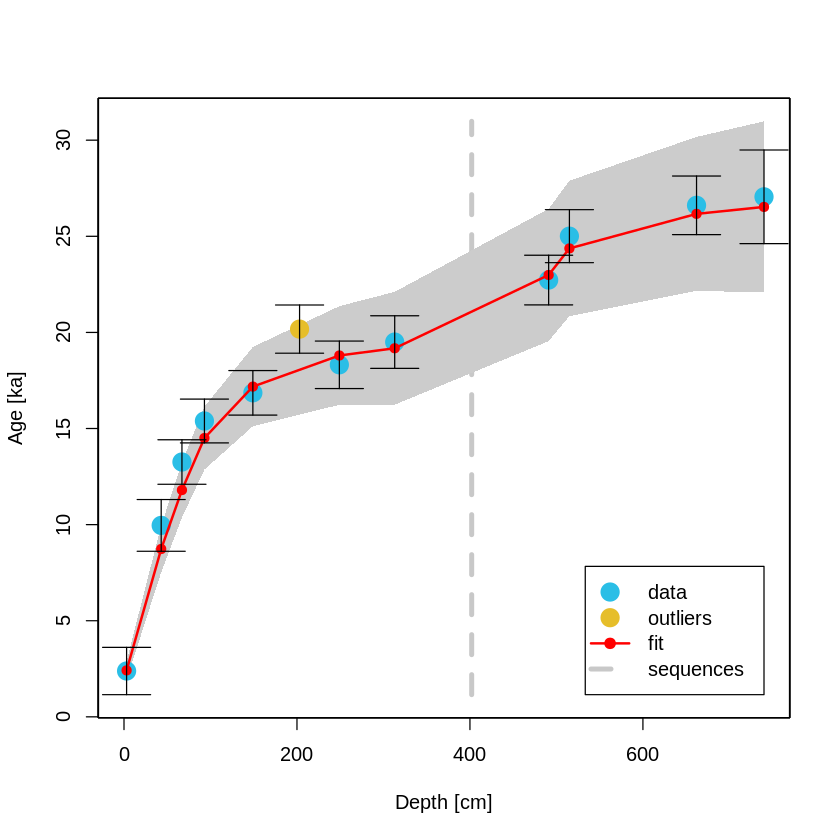

In [114]:
## plotting ages                                                                                                                                                                         
    for (k in plot_format){
        if (k == "jupyter"){
            Ascale <- 1 #4                                                                                                                                                                   
            Bscale <- 1 #6                                                                                                                                                                   
            Cscale <- 2 #8                                                                                                                                                                   
            Dscale <- 4 #12                                                                                                                                                                  
        } else {
            Ascale <- 4
            Bscale <- 6
            Cscale <- 8
            Dscale <- 12

            par(mar=c(14,14,4,2),mgp=c(10,4,0),bg=rgb(248/255,250/255,252/255))
            if (k == "png"){
                png(filename=paste(path,token,"_ages.png",sep=""),width=2000,height=1400,pointsize=10)#,width=11,height=8)                                                                   
            }
            if (k == "pdf"){
                pdf(file=paste(path,token,"_ages.pdf",sep=""),width=40,height=28)#,width=11,height=8)                                                                                        
            }
        }


        ymin <- min(c(ageData$age-ageData$error,ageDataOrig$age),na.rm=TRUE)
        ymax <- max(c(ageData$age+ageData$error,ageDataOrig$age,ageFit+ageFitError),na.rm=TRUE)
        xmin <- 0 ##min(ageDataOrig$depth)                                                                                                                                                   
        xmax <- max(ageDataOrig$depth)
        plot(ageData$depth,ageData$age,ylim=c(ymin,ymax),xlim=c(xmin,xmax),xlab="Depth [cm]",ylab="Age [ka]",cex.lab=Ascale,cex.axis=Ascale)
        if (Lsegments > 0) {
            for (i in seq(1,length(segPosPlot))) {
                par(new=TRUE)
                segPosDepth <- (ageData$depth[segPosPlot[i]]+ageData$depth[segPosPlot[i]+1])/2
                plot(c(segPosDepth,segPosDepth),c(ymin,ymax),ylim=c(ymin,ymax),xlim=c(xmin,xmax),col=rgb(200/255,200/255,200/255),type="l",lwd=Dscale,lty=2,xlab="",ylab="",xaxt="n",yaxt="n",cex=Cscale)
            }
        }
        par(new=TRUE)
        polygon(c(ageData$depth, rev(ageData$depth)), c(ageFit-ageFitError,
                                                        rev(ageFit+ageFitError)), col=rgb(0.8,0.8,0.8),border=NA,xlim=c(xmin,xmax),)
        par(new=TRUE)
        plot(ageData$depth,ageData$age,ylim=c(ymin,ymax),xlim=c(xmin,xmax),col=rgb(42/255,190/255,230/255),pch=19,xlab="",ylab="",xaxt="n",yaxt="n",cex=Cscale)
        par(new=TRUE)
        plot(ageDataOrig$depth[negRatesIndex],ageDataOrig$age[negRatesIndex],ylim=c(ymin,ymax),xlim=c(xmin,xmax),col=rgb(230/255,190/255,42/255),pch=19,xlab="",ylab="",xaxt="n",yaxt="n",cex=Cscale)
        par(new=TRUE)
        plot(ageData$depth,ageFit,ylim=c(ymin,ymax),xlim=c(xmin,xmax),xlab="",pch=19,ylab="",xaxt="n",yaxt="n",col="red",cex=Ascale)
        par(new=TRUE)
        plot(ageData$depth,ageFit,ylim=c(ymin,ymax),xlim=c(xmin,xmax),lwd=Cscale,xlab="",ylab="",xaxt="n",yaxt="n",type="l",col="red",cex=Cscale)

        arrows(ageDataOrig$depth, ageDataOrig$age-ageDataOrig$error, ageDataOrig$depth,
               ageDataOrig$age+ageDataOrig$error, length=0.2, angle=90, code=3,col="black",lwd=Bscale,cex=Cscale)

        legend(xmax, ymin, xjust=1,yjust=0,legend=c("data","outliers","fit","sequences"),
               col=c(rgb(42/255,190/255,230/255),rgb(230/255,190/255,42/255),"red",rgb(200/255,200/255,200/255)), lwd=c(NaN,NaN,Cscale,Dscale), lty=c(1,1,1,2), pch=c(19,19,19,NaN), cex=c(Bscale), pt.cex=c(Cscale,Cscale,Ascale,NaN))

        if (k != "jupyter"){
            dev.off()
        }
    }
    ##--------------------------------------------------------------------------------------------##  

![title](KHzvfrTgfX_ages.png)